In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/winequality-red.csv")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


데이터 사전
fixed acidity - 결합 산도
volatile acidity - 휘발성 산도
citric acid - 시트르산
residual sugar - 잔류설탕
chlorides - 염화물
free sulfur dioxide - 자유 이산화황
total sulfur dioxide - 총 이산화황
density - 밀도
pH - pH
sulphates - 황산염
alcohol - 알콜
quality - 품질(0~10점)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model_tree = DecisionTreeClassifier(max_depth=10)

In [18]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [19]:
model_tree.score(X_test, y_test)

0.5875

In [20]:
# 데이터 분석후 전처리 다시해서 성능측정
data = pd.read_csv("data/winequality-red.csv")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free sulfur dioxide'),
  Text(7, 0, 'total sulfur dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality')])

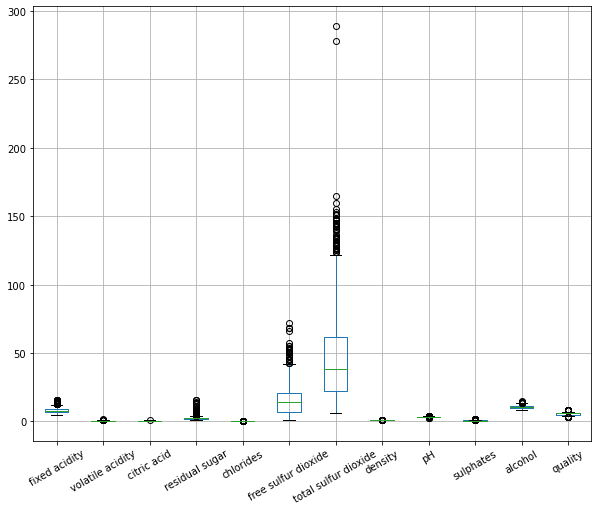

In [24]:
data.boxplot(figsize=(10,8))
plt.xticks(rotation=30)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'density'),
  Text(7, 0, 'pH'),
  Text(8, 0, 'sulphates'),
  Text(9, 0, 'alcohol'),
  Text(10, 0, 'quality')])

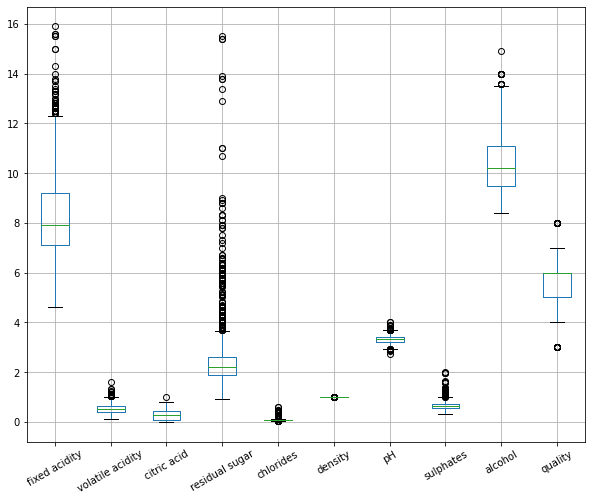

In [27]:
data.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).boxplot(figsize=(10,8))
plt.xticks(rotation=30)

<AxesSubplot:>

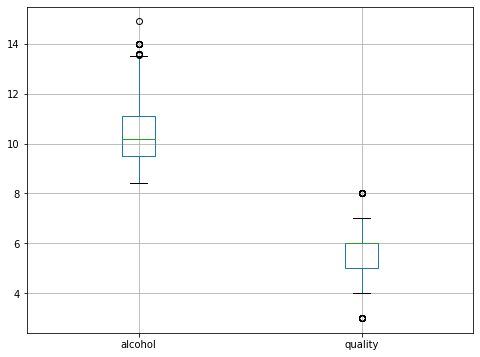

In [29]:
data[['alcohol', 'quality']].boxplot(figsize=(8,6))

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

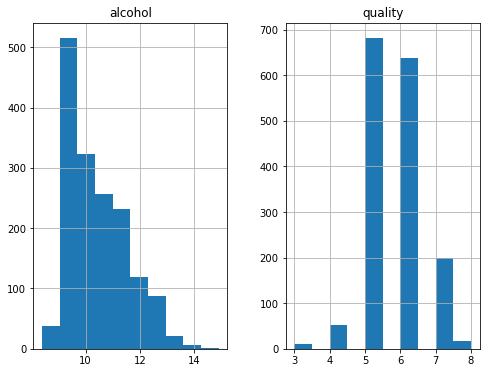

In [31]:
data[['alcohol', 'quality']].hist(figsize=(8, 6))

<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>

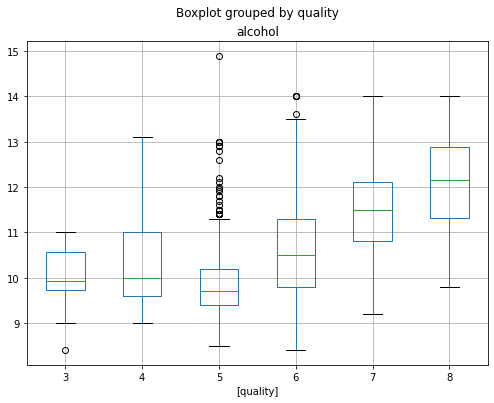

In [32]:
data[['alcohol', 'quality']].boxplot(by='quality', figsize=(8, 6))

In [33]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
# 3~8까지의 품질을 6.5를 기준으로 좋은와인(1),나쁜와인(0)
new_quality_list=[]

for i in data['quality']:
    if i >= 6.5:
        new_quality_list.append(1)
    else :
        new_quality_list.append(0)
        
new_quality_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [37]:
new_quality = pd.Series(new_quality_list)
new_quality

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Length: 1599, dtype: int64

In [39]:
data['new_quality'] = new_quality
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [40]:
data['new_quality'].value_counts()

0    1382
1     217
Name: new_quality, dtype: int64

In [41]:
X = data.drop(['quality', 'new_quality'], axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [42]:
y = data['new_quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: new_quality, Length: 1599, dtype: int64

In [43]:
X.shape, y.shape

((1599, 11), (1599,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model_knn = KNeighborsClassifier()

In [47]:
model_knn.fit(X_train, y_train)
model_knn.score(X_test, y_test)

0.853125

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_tree = DecisionTreeClassifier()

In [50]:
model_tree.fit(X_train, y_train)
model_tree.score(X_test, y_test)

0.865625

In [ ]:
# 성능을 더욱 높이기위해 데이터 스케일링 작업(데이터 전처리작업)
# 전체 데이터의 분포를 평균 0 분산 1이 되도록 하는 작업
# X 데이터에 수치데이터만 있어야합니다.
# 테스트 데이터 또한 스케일링을 해야합니다.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [53]:
X_sc = sc.fit_transform(X)

In [54]:
X_sc

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [57]:
# 스케일링한 데이터로 다시 학습데이터 만들기
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=7)

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [61]:
model_knn_sc = KNeighborsClassifier()
model_knn_sc.fit(X_train, y_train)
model_knn_sc.score(X_test, y_test)

0.878125

In [65]:
model_tree_sc = DecisionTreeClassifier(max_depth=2)
model_tree_sc.fit(X_train, y_train)
model_tree_sc.score(X_test, y_test)

0.903125

In [69]:
depth_list = []
tree_score_list = []
for i in range(1, 101):
    model_tree_sc = DecisionTreeClassifier(max_depth=i)
    model_tree_sc.fit(X_train, y_train)
    tree_score_list.append(model_tree_sc.score(X_test, y_test))
    depth_list.append(i)
    

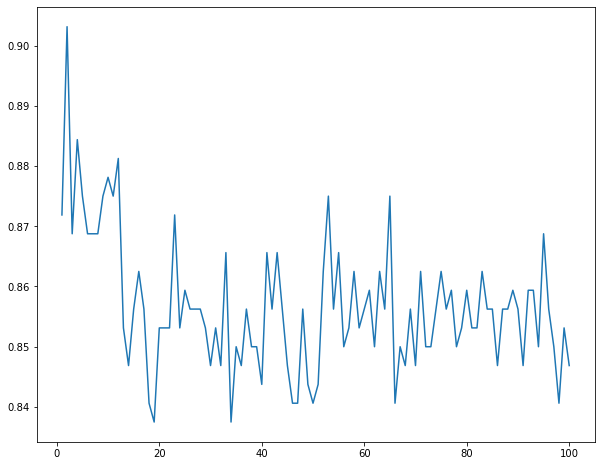

In [77]:
plt.figure(figsize=(10,8))
plt.plot(depth_list, tree_score_list)

In [78]:
model_tree_sc = DecisionTreeClassifier(max_depth=5)
model_tree_sc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(288.38942307692304, 398.64, 'X[10] <= 1.058\ngini = 0.237\nsamples = 1279\nvalue = [1103, 176]'), Text(152.91346153846152, 326.15999999999997, 'X[1] <= -0.854\ngini = 0.148\nsamples = 1090\nvalue = [1002, 88]'), Text(85.84615384615384, 253.67999999999998, 'X[10] <= 0.025\ngini = 0.387\nsamples = 187\nvalue = [138, 49]'), Text(42.92307692307692, 181.2, 'X[0] <= 1.942\ngini = 0.185\nsamples = 97\nvalue = [87, 10]'), Text(21.46153846153846, 108.71999999999997, 'X[7] <= -1.13\ngini = 0.088\nsamples = 87\nvalue = [83, 4]'), Text(10.73076923076923, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(32.19230769230769, 36.23999999999995, 'gini = 0.067\nsamples = 86\nvalue = [83, 3]'), Text(64.38461538461539, 108.71999999999997, 'X[3] <= -0.063\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'), Text(53.653846153846146, 36.23999999999995, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'), Text(75.11538461538461, 36.23999999999995, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'), Text(128

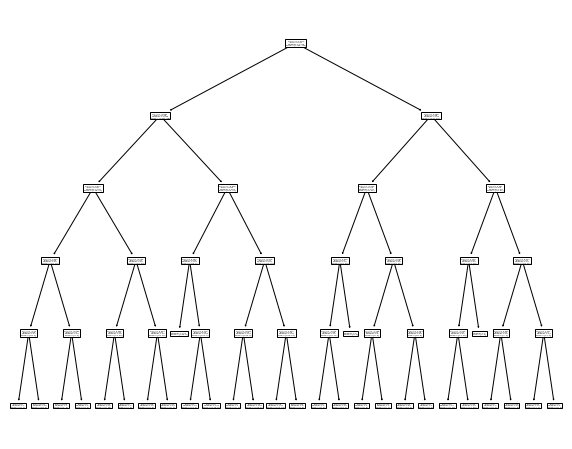

In [81]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
print(plot_tree(model_tree_sc))

In [91]:
a = DecisionTreeClassifier()
a

DecisionTreeClassifier()